# Computer Vision Homework 3

Question 4

Amirkabir University of Technology

Dr. Safabakhsh

By Gholamreza Dar 400131018

Fall 2022


## Imports

In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('dark')

import os
import datetime

c:\Users\GHD\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\GHD\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
c:\Users\GHD\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\GHD\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\GHD\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Functions

In [2]:
def rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def bgr(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def disp(img, title='', s=8, vmin=None, vmax=None):
    plt.figure(figsize=(s,s))
    plt.axis('off')
    if vmin is not None and vmax is not None:
        plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

def uint8ify(img):
    img -= img.min()
    img /= img.max()
    img *= 255
    return np.uint8(img)

def overlay(a,b):
    # a and b should be float images and between 0-1

    mask = a >= 0.5 # generate boolean mask of everywhere a > 0.5 
    ab = np.zeros_like(a) # generate an output container for the blended image 

    # now do the blending 
    ab[~mask] = (2*a*b)[~mask] # 2ab everywhere a<0.5
    ab[mask] = (1-2*(1-a)*(1-b))[mask] # else this
    
    return ab

def before_after(img_a, img_b, name='', vmin=None, vmax=None, effect_name='Processed'):
    fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(10,4))
    axs[0].axis('off')
    axs[1].axis('off')
    axs[0].set_title(f'{name} Original')
    axs[1].set_title(f'{name} {effect_name}')
    if vmin is not None and vmax is not None:
        axs[0].imshow(img_a, cmap='gray', vmin=vmin, vmax=vmax)
        axs[1].imshow(img_b, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        axs[0].imshow(img_a, cmap='gray')
        axs[1].imshow(img_b, cmap='gray')
    plt.show()

## Load Images

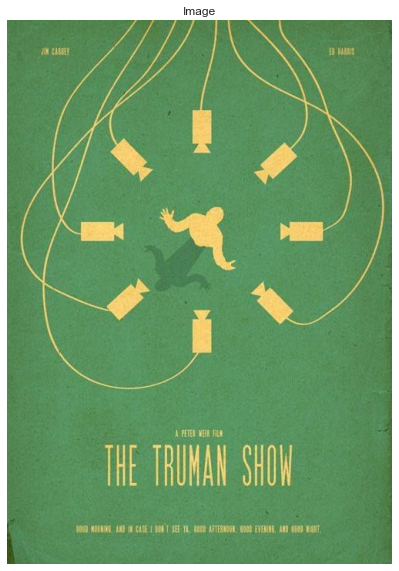

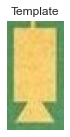

In [3]:
image = rgb(cv2.imread('data/img.jpeg'))
template = rgb(cv2.imread('data/template.jpeg'))

disp(image, 'Image', s=10)
disp(template, 'Template', s=2)

## Template Matching

In [4]:
from ipywidgets import interact

cv2.TM_CCOEFF

@interact(method=['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'])
def match_template_interactive(method='cv2.TM_CCOEFF'):
    match = cv2.matchTemplate(image, template, eval(method))

    disp(match, 'Match Template')

interactive(children=(Dropdown(description='method', options=('cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM…

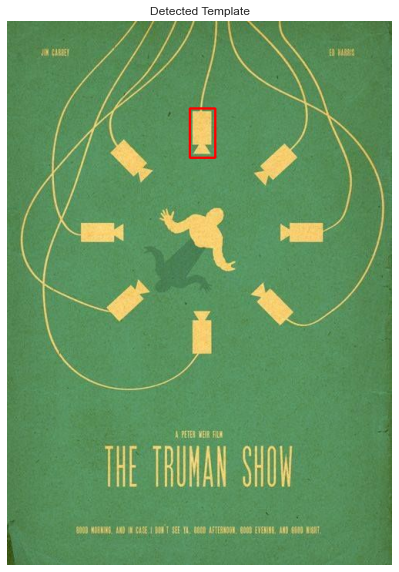

In [5]:
match = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
image_display = image.copy()

# find the bounding box of the match
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match)
top_left = max_loc
bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])

# draw the bounding box
cv2.rectangle(image_display, top_left, bottom_right, (255,0,0), 2)

disp(image_display, 'Detected Template', s=10)

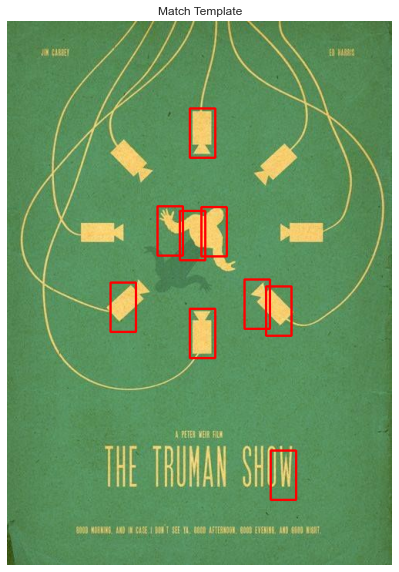

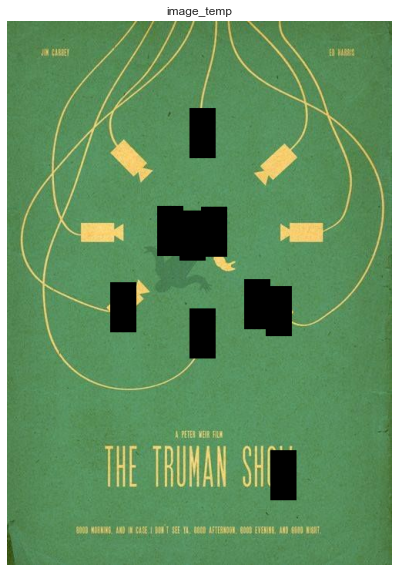

In [6]:
image_temp = image.copy() # this image will change after each instance is found(set to black)
image_display = image.copy()

for i in range(9):
    match = cv2.matchTemplate(image_temp, template, cv2.TM_CCOEFF_NORMED)

    # find the bounding box of the match
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match)
    top_left = max_loc
    bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])

    # fill the bounding box with black(image_temp)
    cv2.rectangle(image_temp, top_left, bottom_right, (0,0,0), -1)

    # draw the bounding box(image_display)
    cv2.rectangle(image_display, top_left, bottom_right, (255,0,0), 2)

disp(image_display, 'Match Template', s=10)
disp(image_temp, "image_temp", s=10)

### + Rotation

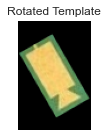

In [10]:
def rotate_image(image, angle=45, pad=15):
    # pad the image so that the rotated image does not get cut off
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_CONSTANT, value=[0,0,0])
    
    # get the image center
    image_center = tuple(np.array(image.shape[1::-1]) / 2)

    # rotate the image
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)

    return result

template_rotated = rotate_image(template, 30)
disp(template_rotated, 'Rotated Template', s=2)

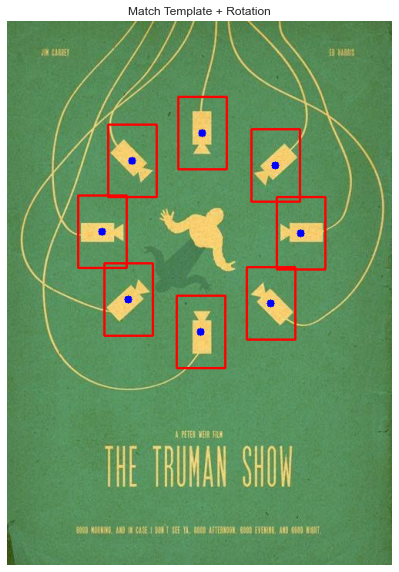

In [8]:
# This time we want to rotate the template each time we find a match

image_temp = image.copy() # this image will change after each instance is found(set to black)
image_display = image.copy()

for i in range(8):
    template_rotated = rotate_image(template, i*(360/8))

    match = cv2.matchTemplate(image_temp, template_rotated, cv2.TM_CCOEFF_NORMED)

    # find the bounding box of the match
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match)
    top_left = max_loc
    bottom_right = (top_left[0] + template_rotated.shape[1], top_left[1] + template_rotated.shape[0])

    # find the center point
    center = (int((top_left[0] + bottom_right[0])/2), int((top_left[1] + bottom_right[1])/2))

    cv2.circle(image_display, center, 5, (0,0,255), -1)

    # draw the bounding box(image_display)
    cv2.rectangle(image_display, top_left, bottom_right, (255,0,0), 2)

disp(image_display, 'Match Template + Rotation', s=10)

## Feature Matching(Didn't work)

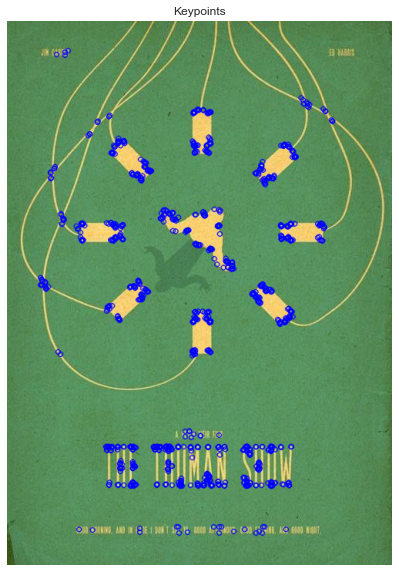

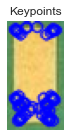

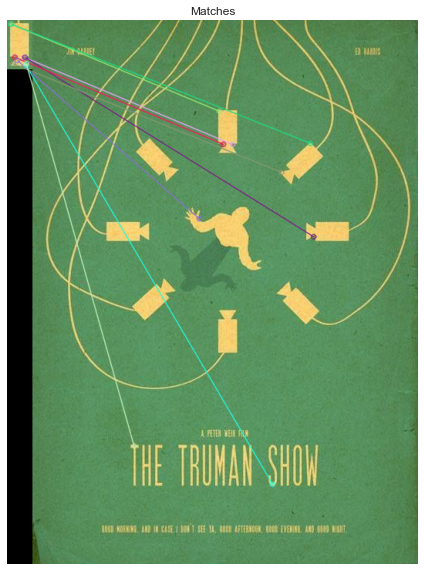

In [9]:
orb = cv2.ORB_create(nfeatures=1000, edgeThreshold=2, patchSize=31)
kp1, des1 = orb.detectAndCompute(template, None)
kp2, des2 = orb.detectAndCompute(image, None)

# plot the keypoints
image_display = image.copy()
cv2.drawKeypoints(image, kp2, image_display, color=(0,0,255), flags=0)
disp(image_display, 'Keypoints', s=10)

# plot the keypoints on template
template_display = template.copy()
cv2.drawKeypoints(template, kp1, template_display, color=(0,0,255), flags=0)
disp(template_display, 'Keypoints', s=2)


# create BFMatcher objec
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1, des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
image_display = cv2.drawMatches(template, kp1, image, kp2, matches[:10], None, flags=2)

disp(image_display, 'Matches', s=10)